<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9039-CDNA-20203/blob/master/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas do projeto

In [1]:
# Instalar pacotes a serem usadas no projeto

In [ ]:
!pip install biokit

In [ ]:
# Carregar bibiotecas a serem usadas no projeto

In [5]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from biokit.viz import corrplot
import matplotlib.pyplot as plt

In [ ]:
# Importar dados a partir de arquivo excel

In [30]:
enem = pd.read_excel (r'/content/sample_data/ENEM_2017_2019_RESUMO_MUNICIPIO.xlsx')
print (enem)

       NU_ANO  Municipio  UF  ... NU_NOTA_LC_CV  NU_NOTA_MT_CV  NU_NOTA_REDACAO_CV
0        2017     110001  RO  ...     37.359091      37.376574           20.481247
1        2017     110002  RO  ...     35.759084      39.035510           22.000760
2        2017     110003  RO  ...     18.272008      34.908982           24.239253
3        2017     110004  RO  ...     35.931553      39.477729           21.833524
4        2017     110005  RO  ...     32.637265      39.784791           22.741036
...       ...        ...  ..  ...           ...            ...                 ...
16705    2019     522200  GO  ...     14.650267      20.333891           27.385585
16706    2019     522205  GO  ...     12.105126      20.519673           26.184023
16707    2019     522220  GO  ...     12.806650      18.053077           25.440972
16708    2019     522230  GO  ...     12.602998      15.005036           24.297281
16709    2019     530010  DF  ...     11.474205      21.839170           25.479352

[16

In [31]:
print("O dataset possui",enem.shape[0], "observações e", enem.shape[1], "atributos")

O dataset possui 16710 observações e 72 atributos


In [17]:
enem.head(10)

,NU_ANO,Municipio,UF,NOME MUNICIPIO,LATITUDE,LONGITUDE,_FREQ_,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean,NU_NOTA_CN_StdDev,NU_NOTA_CH_StdDev,NU_NOTA_LC_StdDev,NU_NOTA_MT_StdDev,NU_NOTA_REDACAO_StdDev,NU_NOTA_CN_Min,NU_NOTA_CH_Min,NU_NOTA_LC_Min,NU_NOTA_MT_Min,NU_NOTA_REDACAO_Min,NU_NOTA_CN_Max,NU_NOTA_CH_Max,NU_NOTA_LC_Max,NU_NOTA_MT_Max,NU_NOTA_REDACAO_Max,NU_NOTA_CN_N,NU_NOTA_CH_N,NU_NOTA_LC_N,NU_NOTA_MT_N,NU_NOTA_REDACAO_N,NU_NOTA_CN_P10,NU_NOTA_CH_P10,NU_NOTA_LC_P10,NU_NOTA_MT_P10,NU_NOTA_REDACAO_P10,NU_NOTA_CN_Q1,NU_NOTA_CH_Q1,NU_NOTA_LC_Q1,NU_NOTA_MT_Q1,NU_NOTA_REDACAO_Q1,NU_NOTA_CN_Median,NU_NOTA_CH_Median,NU_NOTA_LC_Median,NU_NOTA_MT_Median,NU_NOTA_REDACAO_Median,NU_NOTA_CN_Q3,NU_NOTA_CH_Q3,NU_NOTA_LC_Q3,NU_NOTA_MT_Q3,NU_NOTA_REDACAO_Q3,NU_NOTA_CN_P90,NU_NOTA_CH_P90,NU_NOTA_LC_P90,NU_NOTA_MT_P90,NU_NOTA_REDACAO_P90,NU_NOTA_CN_P95,NU_NOTA_CH_P95,NU_NOTA_LC_P95,NU_NOTA_MT_P95,NU_NOTA_REDACAO_P95,NU_NOTA_CN_P99,NU_NOTA_CH_P99,NU_NOTA_LC_P99,NU_NOTA_MT_P99,NU_NOTA_REDACAO_P99,NU_NOTA_CN_CV,NU_NOTA_CH_CV,NU_NOTA_LC_CV,NU_NOTA_MT_CV,NU_NOTA_REDACAO_CV
0,2017,110001,RO,Alta Floresta d`Oeste,-11.92,-61.99,485,458.507113,447.153381,435.469753,454.407320,521.237113,144.484118,173.001011,162.687541,169.841888,106.755859,3.83,3.80,3.45,3.73,220,653.3,666.1,623.6,817.9,860,485,485,485,485,485,391.70,5.87,5.47,355.20,380,436.60,431.30,433.10,406.50,460,488.30,496.10,482.90,487.70,520,538.70,546.30,526.20,558.50,580,574.70,590.9,557.6,616.20,660,590.60,611.5,578.80,640.8,700,624.4,640.1,607.3,708.8,800,31.511860,38.689411,37.359091,37.376574,20.481247
1,2017,110002,RO,Ariquemes,-9.91,-63.04,2349,448.773244,462.653691,449.300200,444.114989,527.007237,166.182006,159.104074,160.665638,173.362552,115.945599,3.77,0.00,0.00,3.56,200,719.1,767.6,682.8,844.2,940,2349,2349,2349,2349,2349,5.98,354.40,6.03,6.78,380,429.90,431.90,443.60,402.90,440,491.40,497.50,495.70,469.60,520,545.10,558.80,536.90,544.70,600,584.70,599.2,569.7,613.40,660,602.60,617.9,585.80,656.8,720,639.1,664.9,624.4,738.9,840,37.030284,34.389453,35.759084,39.035510,22.000760
2,2017,110003,RO,Cabixi,-13.49,-60.54,61,485.948852,410.474098,473.641803,450.697213,473.442623,86.855009,200.839154,86.543870,157.333807,114.758954,5.48,3.89,5.05,3.80,200,652.8,619.3,605.1,691.3,760,61,61,61,61,61,415.60,5.51,399.50,380.50,360,451.50,403.50,447.50,406.70,400,489.40,485.30,482.60,462.70,460,530.50,543.10,528.30,527.20,560,571.90,579.3,554.9,607.70,580,594.40,602.7,564.80,655.7,680,652.8,619.3,605.1,691.3,760,17.873282,48.928582,18.272008,34.908982,24.239253
3,2017,110004,RO,Cacoal,-11.43,-61.44,3083,455.896526,463.947541,452.063357,452.107862,534.122608,166.436477,168.451976,162.433386,178.481917,116.617788,0.00,0.00,0.00,0.00,180,723.4,737.7,652.8,838.8,980,3083,3083,3083,3083,3083,6.01,336.60,6.08,6.44,400,440.40,433.60,442.10,411.20,460,496.20,505.20,500.10,478.10,540,552.30,566.60,542.40,557.10,600,588.40,607.3,574.8,626.70,680,609.70,628.1,592.60,669.7,740,648.5,668.2,623.9,745.5,860,36.507512,36.308410,35.931553,39.477729,21.833524
4,2017,110005,RO,Cerejeiras,-13.18,-60.81,252,449.655397,455.210357,455.497103,446.151190,542.222222,173.706809,174.530289,148.661795,177.500318,123.306950,4.00,3.70,4.13,3.96,240,627.6,726.7,625.1,763.2,900,252,252,252,252,252,6.04,6.00,354.10,6.71,400,433.55,429.80,450.00,411.50,460,497.60,491.30,490.65,472.75,540,556.80,567.65,533.00,543.85,620,582.70,604.9,564.7,637.30,720,601.20,626.7,577.70,663.4,780,615.1,665.5,602.6,707.1,900,38.631096,38.340579,32.637265,39.784791,22.741036
5,2017,110006,RO,Colorado do Oeste,-13.11,-60.54,240,459.933917,469.193500,442.634500,466.191333,537.583333,160.427019,159.322091,164.412525,155.159320,100.405003,4.04,3.72,3.79,3.66,260,674.2,721.9,624.4,818.8,860,240,240,240,240,240,381.60,366.40,5.60,374.15,410,439.20,442.75,443.15,419.45,480,499.65,510.50,487.80,475.05,540,550.80,563.15,532.30,560.05,600,585.55,599.9,563.7,609.75,680,611.15,618.6,585.45,646.2,710,636.8,647.5,609.

In [18]:
# Renomear etiqueta de coluna "NOME MUNICIPIO" para "Nome_Municipio"

In [32]:
enem_alt_01 = enem.rename(columns={"NOME MUNICIPIO":"Nome_Municipio"}).copy()

In [ ]:
# Listar nomes de colunas do dataframe

In [33]:
enem_alt_01.columns

Index(['NU_ANO', 'Municipio', 'UF', 'Nome_Municipio', 'LATITUDE', 'LONGITUDE',
       '_FREQ_', 'NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean',
       'NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean', 'NU_NOTA_CN_StdDev',
       'NU_NOTA_CH_StdDev', 'NU_NOTA_LC_StdDev', 'NU_NOTA_MT_StdDev',
       'NU_NOTA_REDACAO_StdDev', 'NU_NOTA_CN_Min', 'NU_NOTA_CH_Min',
       'NU_NOTA_LC_Min', 'NU_NOTA_MT_Min', 'NU_NOTA_REDACAO_Min',
       'NU_NOTA_CN_Max', 'NU_NOTA_CH_Max', 'NU_NOTA_LC_Max', 'NU_NOTA_MT_Max',
       'NU_NOTA_REDACAO_Max', 'NU_NOTA_CN_N', 'NU_NOTA_CH_N', 'NU_NOTA_LC_N',
       'NU_NOTA_MT_N', 'NU_NOTA_REDACAO_N', 'NU_NOTA_CN_P10', 'NU_NOTA_CH_P10',
       'NU_NOTA_LC_P10', 'NU_NOTA_MT_P10', 'NU_NOTA_REDACAO_P10',
       'NU_NOTA_CN_Q1', 'NU_NOTA_CH_Q1', 'NU_NOTA_LC_Q1', 'NU_NOTA_MT_Q1',
       'NU_NOTA_REDACAO_Q1', 'NU_NOTA_CN_Median', 'NU_NOTA_CH_Median',
       'NU_NOTA_LC_Median', 'NU_NOTA_MT_Median', 'NU_NOTA_REDACAO_Median',
       'NU_NOTA_CN_Q3', 'NU_NOTA_CH_Q3', 'NU_NO

In [ ]:
# Descatar colunas que não serão utilizadas no projeto

In [34]:
enem_alt_02 = enem_alt_01.drop(['NU_NOTA_CN_StdDev',
       'NU_NOTA_CH_StdDev', 'NU_NOTA_LC_StdDev', 'NU_NOTA_MT_StdDev',
       'NU_NOTA_REDACAO_StdDev', 'NU_NOTA_CN_Min', 'NU_NOTA_CH_Min',
       'NU_NOTA_LC_Min', 'NU_NOTA_MT_Min', 'NU_NOTA_REDACAO_Min',
       'NU_NOTA_CN_Max', 'NU_NOTA_CH_Max', 'NU_NOTA_LC_Max', 'NU_NOTA_MT_Max',
       'NU_NOTA_REDACAO_Max', 'NU_NOTA_CN_N', 'NU_NOTA_CH_N', 'NU_NOTA_LC_N',
       'NU_NOTA_MT_N', 'NU_NOTA_REDACAO_N', 'NU_NOTA_CN_P10', 'NU_NOTA_CH_P10',
       'NU_NOTA_LC_P10', 'NU_NOTA_MT_P10', 'NU_NOTA_REDACAO_P10',
       'NU_NOTA_CN_Q1', 'NU_NOTA_CH_Q1', 'NU_NOTA_LC_Q1', 'NU_NOTA_MT_Q1',
       'NU_NOTA_REDACAO_Q1', 'NU_NOTA_CN_Median', 'NU_NOTA_CH_Median',
       'NU_NOTA_LC_Median', 'NU_NOTA_MT_Median', 'NU_NOTA_REDACAO_Median',
       'NU_NOTA_CN_Q3', 'NU_NOTA_CH_Q3', 'NU_NOTA_LC_Q3', 'NU_NOTA_MT_Q3',
       'NU_NOTA_REDACAO_Q3', 'NU_NOTA_CN_P90', 'NU_NOTA_CH_P90',
       'NU_NOTA_LC_P90', 'NU_NOTA_MT_P90', 'NU_NOTA_REDACAO_P90',
       'NU_NOTA_CN_P95', 'NU_NOTA_CH_P95', 'NU_NOTA_LC_P95', 'NU_NOTA_MT_P95',
       'NU_NOTA_REDACAO_P95', 'NU_NOTA_CN_P99', 'NU_NOTA_CH_P99',
       'NU_NOTA_LC_P99', 'NU_NOTA_MT_P99', 'NU_NOTA_REDACAO_P99',
       'NU_NOTA_CN_CV', 'NU_NOTA_CH_CV', 'NU_NOTA_LC_CV', 'NU_NOTA_MT_CV',
       'NU_NOTA_REDACAO_CV'], axis=1)

In [35]:
enem_alt_02

,NU_ANO,Municipio,UF,Nome_Municipio,LATITUDE,LONGITUDE,_FREQ_,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
0,2017,110001,RO,Alta Floresta d`Oeste,-11.92,-61.99,485,458.507113,447.153381,435.469753,454.407320,521.237113
1,2017,110002,RO,Ariquemes,-9.91,-63.04,2349,448.773244,462.653691,449.300200,444.114989,527.007237
2,2017,110003,RO,Cabixi,-13.49,-60.54,61,485.948852,410.474098,473.641803,450.697213,473.442623
3,2017,110004,RO,Cacoal,-11.43,-61.44,3083,455.896526,463.947541,452.063357,452.107862,534.122608
4,2017,110005,RO,Cerejeiras,-13.18,-60.81,252,449.655397,455.210357,455.497103,446.151190,542.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,2019,522200,GO,Vianópolis,-16.74,-48.51,152,469.423684,496.394737,513.403289,532.111842,585.394737
16706,2019,522205,GO,Vicentinópolis,-17.73,-49.80,38,447.094737,462.842105,493.955263,503.886842,518.947368
16707,2019,522220,GO,Vila Boa,-15.03,-47.05,33,433.433333,447.378788,473.627273,471.042424,545.454545
16708,2019,522230,GO,Vila Propício,-15.45,-48.88,41,446.921951,459.314634,480.470732,470.914634,496.585366


# Análise dos dados

In [ ]:
# Selecionar colunas a serem analisadas

In [46]:
enem_alt_02[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']]

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
0,458.507113,447.153381,435.469753,454.407320,521.237113
1,448.773244,462.653691,449.300200,444.114989,527.007237
2,485.948852,410.474098,473.641803,450.697213,473.442623
3,455.896526,463.947541,452.063357,452.107862,534.122608
4,449.655397,455.210357,455.497103,446.151190,542.222222
...,...,...,...,...,...
16705,469.423684,496.394737,513.403289,532.111842,585.394737
16706,447.094737,462.842105,493.955263,503.886842,518.947368
16707,433.433333,447.378788,473.627273,471.042424,545.454545
16708,446.921951,459.314634,480.470732,470.914634,496.585366


In [ ]:
# Analisar dataframe

In [47]:
enem_alt_02[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].describe()

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000
mean,465.959022,503.526274,489.862802,493.655836,538.327931
std,25.413652,47.393337,36.914291,41.132720,49.091104
min,280.425714,211.135714,294.011538,276.285455,361.052632
25%,448.613445,467.226784,464.619451,466.131481,506.053871
50%,465.201705,499.389606,494.938413,495.005441,540.000000
75%,483.123869,540.053644,518.479935,522.264720,571.094629
max,586.900000,629.600000,582.900000,702.112500,746.000000


In [ ]:
# Gerar matrix de correlaçãown entre as variáveis principais

In [50]:
enem_alt_02[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].corr()

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
NU_NOTA_CN_Mean,1.000000,0.756167,0.715700,0.790204,0.246537
NU_NOTA_CH_Mean,0.756167,1.000000,0.792532,0.799939,-0.094993
NU_NOTA_LC_Mean,0.715700,0.792532,1.000000,0.870410,0.256086
NU_NOTA_MT_Mean,0.790204,0.799939,0.870410,1.000000,0.294678
NU_NOTA_REDACAO_Mean,0.246537,-0.094993,0.256086,0.294678,1.000000


/usr/local/lib/python3.6/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



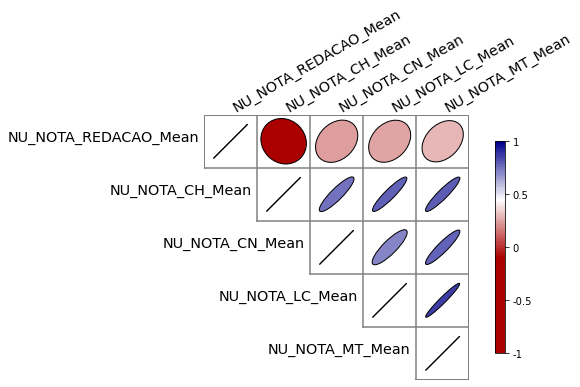

In [53]:
corr_graf = corrplot.Corrplot(enem_alt_02[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].corr())
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(14,7)
fig.show()

# Normalização dos dados

In [ ]:
# Normalizar dados manualmente - Método MIN MAX Scaler

In [54]:
enem_alt_02[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].describe()

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000
mean,465.959022,503.526274,489.862802,493.655836,538.327931
std,25.413652,47.393337,36.914291,41.132720,49.091104
min,280.425714,211.135714,294.011538,276.285455,361.052632
25%,448.613445,467.226784,464.619451,466.131481,506.053871
50%,465.201705,499.389606,494.938413,495.005441,540.000000
75%,483.123869,540.053644,518.479935,522.264720,571.094629
max,586.900000,629.600000,582.900000,702.112500,746.000000


In [ ]:
# Copiar datafra enem_alt_02 para enem_alt_03

In [108]:
enem_alt_03 = enem_alt_02.copy()

In [109]:
enem_alt_03

,NU_ANO,Municipio,UF,Nome_Municipio,LATITUDE,LONGITUDE,_FREQ_,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
0,2017,110001,RO,Alta Floresta d`Oeste,-11.92,-61.99,485,458.507113,447.153381,435.469753,454.407320,521.237113
1,2017,110002,RO,Ariquemes,-9.91,-63.04,2349,448.773244,462.653691,449.300200,444.114989,527.007237
2,2017,110003,RO,Cabixi,-13.49,-60.54,61,485.948852,410.474098,473.641803,450.697213,473.442623
3,2017,110004,RO,Cacoal,-11.43,-61.44,3083,455.896526,463.947541,452.063357,452.107862,534.122608
4,2017,110005,RO,Cerejeiras,-13.18,-60.81,252,449.655397,455.210357,455.497103,446.151190,542.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,2019,522200,GO,Vianópolis,-16.74,-48.51,152,469.423684,496.394737,513.403289,532.111842,585.394737
16706,2019,522205,GO,Vicentinópolis,-17.73,-49.80,38,447.094737,462.842105,493.955263,503.886842,518.947368
16707,2019,522220,GO,Vila Boa,-15.03,-47.05,33,433.433333,447.378788,473.627273,471.042424,545.454545
16708,2019,522230,GO,Vila Propício,-15.45,-48.88,41,446.921951,459.314634,480.470732,470.914634,496.585366


In [110]:
atributos_enem_alt_03 = enem_alt_03[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].columns

In [111]:
atributos_enem_alt_03

Index(['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean',
       'NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean'],
      dtype='object')

In [112]:
for atributo in atributos_enem_alt_03:
  enem_alt_03.loc[:][atributo] = (enem_alt_03.loc[:][atributo]-min(enem_alt_03.loc[:][atributo]))/(max(enem_alt_03.loc[:][atributo])-min(enem_alt_03.loc[:][atributo]))

In [113]:
enem_alt_03[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].describe()

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000
mean,0.605380,0.698723,0.677948,0.510466,0.460518
std,0.082923,0.113255,0.127780,0.096595,0.127527
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.548783,0.611978,0.590567,0.445829,0.376678
50%,0.602909,0.688837,0.695517,0.513636,0.464862
75%,0.661387,0.786012,0.777007,0.577651,0.545638
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Normalizar dados SKlearn - Método MIN MAX Scaler

In [ ]:
# Copiar datafra enem_alt_02 para enem_alt_04

In [100]:
enem_alt_04 = enem_alt_02.copy()

In [101]:
enem_alt_04

,NU_ANO,Municipio,UF,Nome_Municipio,LATITUDE,LONGITUDE,_FREQ_,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
0,2017,110001,RO,Alta Floresta d`Oeste,-11.92,-61.99,485,458.507113,447.153381,435.469753,454.407320,521.237113
1,2017,110002,RO,Ariquemes,-9.91,-63.04,2349,448.773244,462.653691,449.300200,444.114989,527.007237
2,2017,110003,RO,Cabixi,-13.49,-60.54,61,485.948852,410.474098,473.641803,450.697213,473.442623
3,2017,110004,RO,Cacoal,-11.43,-61.44,3083,455.896526,463.947541,452.063357,452.107862,534.122608
4,2017,110005,RO,Cerejeiras,-13.18,-60.81,252,449.655397,455.210357,455.497103,446.151190,542.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,2019,522200,GO,Vianópolis,-16.74,-48.51,152,469.423684,496.394737,513.403289,532.111842,585.394737
16706,2019,522205,GO,Vicentinópolis,-17.73,-49.80,38,447.094737,462.842105,493.955263,503.886842,518.947368
16707,2019,522220,GO,Vila Boa,-15.03,-47.05,33,433.433333,447.378788,473.627273,471.042424,545.454545
16708,2019,522230,GO,Vila Propício,-15.45,-48.88,41,446.921951,459.314634,480.470732,470.914634,496.585366


In [102]:
atributos_enem_alt_04 = enem_alt_02[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']].columns

In [103]:
atributos_enem_alt_04

Index(['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean',
       'NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean'],
      dtype='object')

In [104]:
from sklearn import preprocessing

In [105]:
min_max_scaler = preprocessing.MinMaxScaler()
np_enem_alt_04 = min_max_scaler.fit_transform(enem_alt_04[['NU_NOTA_CN_Mean', 'NU_NOTA_CH_Mean', 'NU_NOTA_LC_Mean','NU_NOTA_MT_Mean', 'NU_NOTA_REDACAO_Mean']])

In [106]:
enem_alt_04 = pd.DataFrame(np_enem_alt_04, columns = atributos_enem_alt_04)

In [107]:
enem_alt_04.describe()

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000
mean,0.605380,0.698723,0.677948,0.510466,0.460518
std,0.082923,0.113255,0.127780,0.096595,0.127527
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.548783,0.611978,0.590567,0.445829,0.376678
50%,0.602909,0.688837,0.695517,0.513636,0.464862
75%,0.661387,0.786012,0.777007,0.577651,0.545638
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Desnormalizar dataframe

In [114]:
np_enem_alt_04 = min_max_scaler.inverse_transform(enem_alt_04)

In [115]:
enem_alt_04 = pd.DataFrame(np_enem_alt_04, columns = atributos_enem_alt_04)

In [116]:
enem_alt_04.describe()

,NU_NOTA_CN_Mean,NU_NOTA_CH_Mean,NU_NOTA_LC_Mean,NU_NOTA_MT_Mean,NU_NOTA_REDACAO_Mean
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000
mean,465.959022,503.526274,489.862802,493.655836,538.327931
std,25.413652,47.393337,36.914291,41.132720,49.091104
min,280.425714,211.135714,294.011538,276.285455,361.052632
25%,448.613445,467.226784,464.619451,466.131481,506.053871
50%,465.201705,499.389606,494.938413,495.005441,540.000000
75%,483.123869,540.053644,518.479935,522.264720,571.094629
max,586.900000,629.600000,582.900000,702.112500,746.000000


# Clusterização dos dados

In [ ]:
# utilizar técnica KMeans

In [117]:
from sklearn.cluster import KMeans

In [123]:
cluster_enem_alt_04 = KMeans(n_clusters = 5)

In [124]:
cluster_enem_alt_04.fit(enem_alt_04)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [125]:
labels = cluster_enem_alt_04.labels_
print(labels)

[1 1 1 ... 2 1 4]


In [126]:
import plotly.graph_objects as go

In [127]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = enem_alt_04['NU_NOTA_MT_Mean'],y = enem_alt_04['NU_NOTA_REDACAO_Mean'],
                        mode = 'markers',
                        marker = dict(color = cluster_enem_alt_04.labels_.astype(np.float)),
                        text = labels))
fig.show()